In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import numpy as np
from scripts.data import get_all_data,remove_high_energy_structures,remove_null_columns,get_energies,H_rattled_batches,CH3_rattled_batches, MOF, ZEOLITE, get_complete_dataframes,get_fold_ids
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('plot.mplstyle')
%config InlineBackend.figure_format = 'retina'

In [11]:
im_complete_cg_df, im_complete_a_df = get_complete_dataframes(energy_cutoff=1,im_linker='H')
new_im_complete_cg_df, new_im_complete_a_df = get_complete_dataframes(energy_cutoff=1,im_linker='H_new')
methyl_complete_cg_df, methyl_complete_a_df = get_complete_dataframes(energy_cutoff=-5.7,im_linker='CH3')

In [15]:

all_H_energies = get_energies(im_complete_cg_df,id_tags=im_complete_cg_df.columns,batches=H_rattled_batches)
all_methyl_energies = get_energies(methyl_complete_cg_df,id_tags=methyl_complete_cg_df.columns,batches=CH3_rattled_batches)
new_H_energies = get_energies(new_im_complete_cg_df,id_tags=new_im_complete_cg_df.columns,batches=CH3_rattled_batches)

In [16]:
all_H_energies = np.concatenate(all_H_energies).reshape(-1,1)
all_methyl_energies = np.concatenate(all_methyl_energies).reshape(-1,1)
new_all_H_energies = np.concatenate(new_H_energies).reshape(-1,1)
len(all_methyl_energies)

25334

([<matplotlib.axis.XTick at 0x43d9b0b50>,
 [Text(0, 0, 'old H'), Text(1, 0, 'new H'), Text(2, 0, 'mIm')])

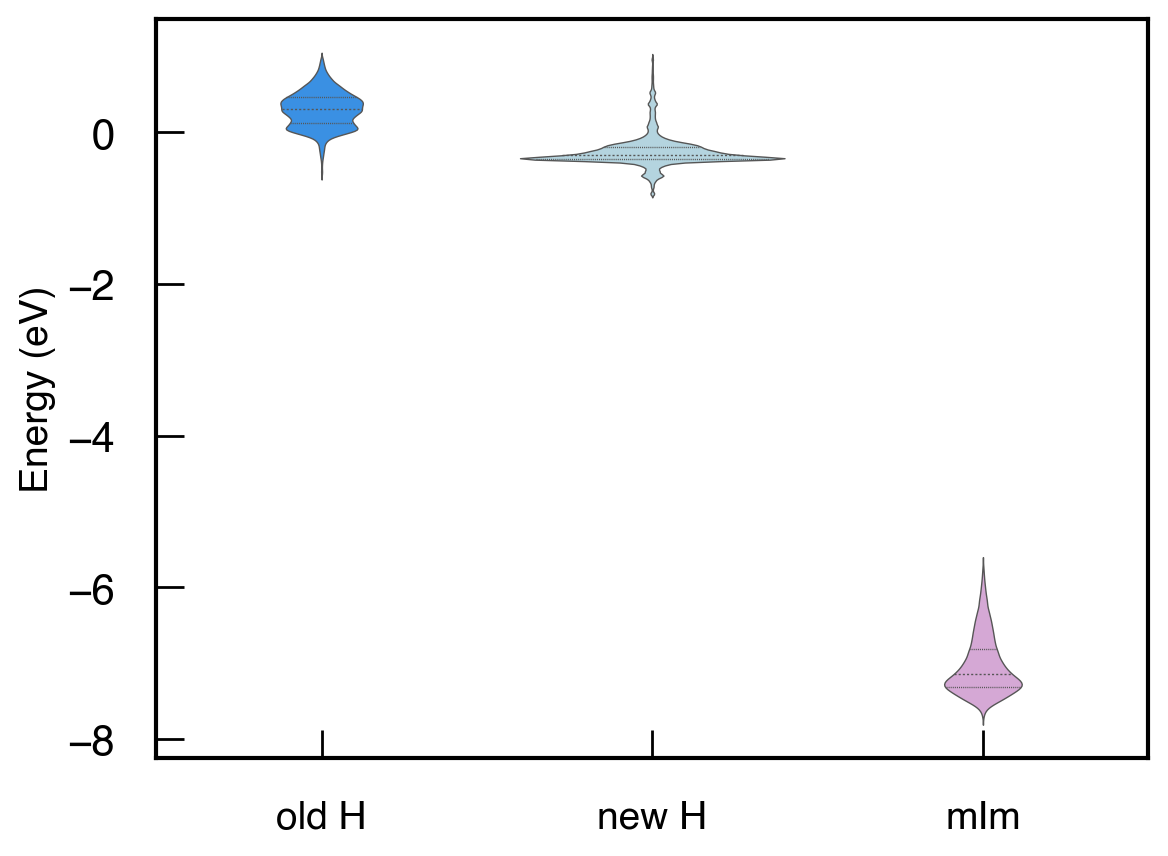

In [19]:
sns.violinplot(data=[all_H_energies,new_all_H_energies,all_methyl_energies],linewidth=0.5, palette=['dodgerblue','lightblue','plum'],inner='quartile')
plt.ylabel('Energy (eV)',fontsize=14)
plt.xticks([0,1,2],['old H','new H', 'mIm'],fontsize=14)

([<matplotlib.axis.XTick at 0x3db31f5e0>,
 [Text(0, 0, 'old H'), Text(1, 0, 'new H')])

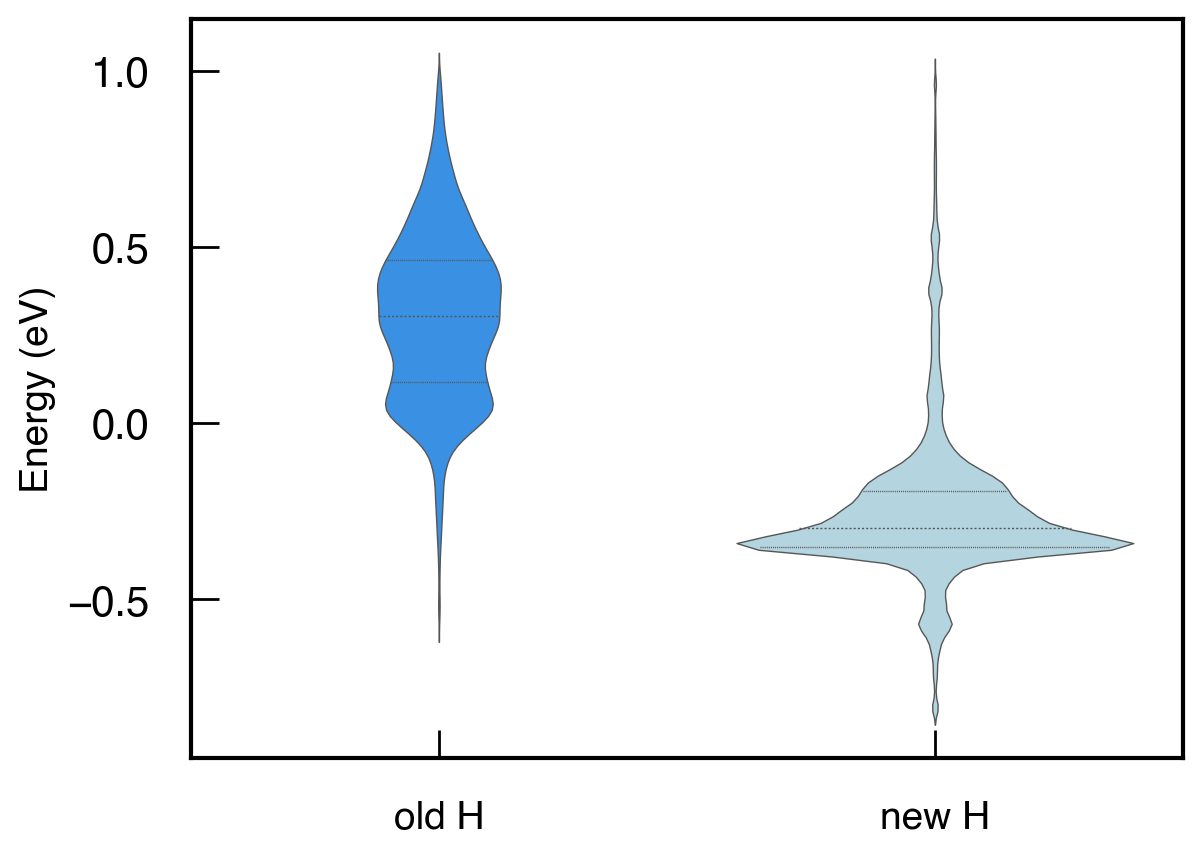

In [21]:
sns.violinplot(data=[all_H_energies,new_all_H_energies],linewidth=0.5, palette=['dodgerblue','lightblue','plum'],inner='quartile')
plt.ylabel('Energy (eV)',fontsize=14)
plt.xticks([0,1],['old H','new H'],fontsize=14)

In [55]:
# get the quartiles
H_quartiles = np.percentile(all_H_energies,[25,50,75])
methyl_quartiles = np.percentile(all_methyl_energies,[25,50,75])

In [30]:
methyl_quartiles


array([-7.09518328, -6.56440874, -5.71071407])

## Energy Distributions

In [2]:
df_mofs = get_all_data(MOF, coarse_grain=True)
df_mofs,a_mofs = remove_high_energy_structures(df_mofs, energy_cutoff=1)
df_mofs = remove_null_columns(df_mofs)

df_zeolites = get_all_data(ZEOLITE, coarse_grain=True)
df_zeolites,a_zeolites = remove_high_energy_structures(df_zeolites, energy_cutoff=1)
df_zeolites = remove_null_columns(df_zeolites)

In [3]:
rattled_zeolites = np.concatenate(get_energies(df_zeolites, id_tags=df_zeolites.columns,batches=all_rattled_batches))
rattled_mofs = np.concatenate(get_energies(df_mofs,id_tags=df_mofs.columns,batches=all_rattled_batches))

unrattled_zeolites = np.concatenate(get_energies(df_zeolites,id_tags=df_zeolites.columns,batches=[1]))
unrattled_mofs = np.concatenate(get_energies(df_mofs, id_tags=df_mofs.columns,batches=[1]))

Text(0, 0.5, 'Local Energies (eV)')

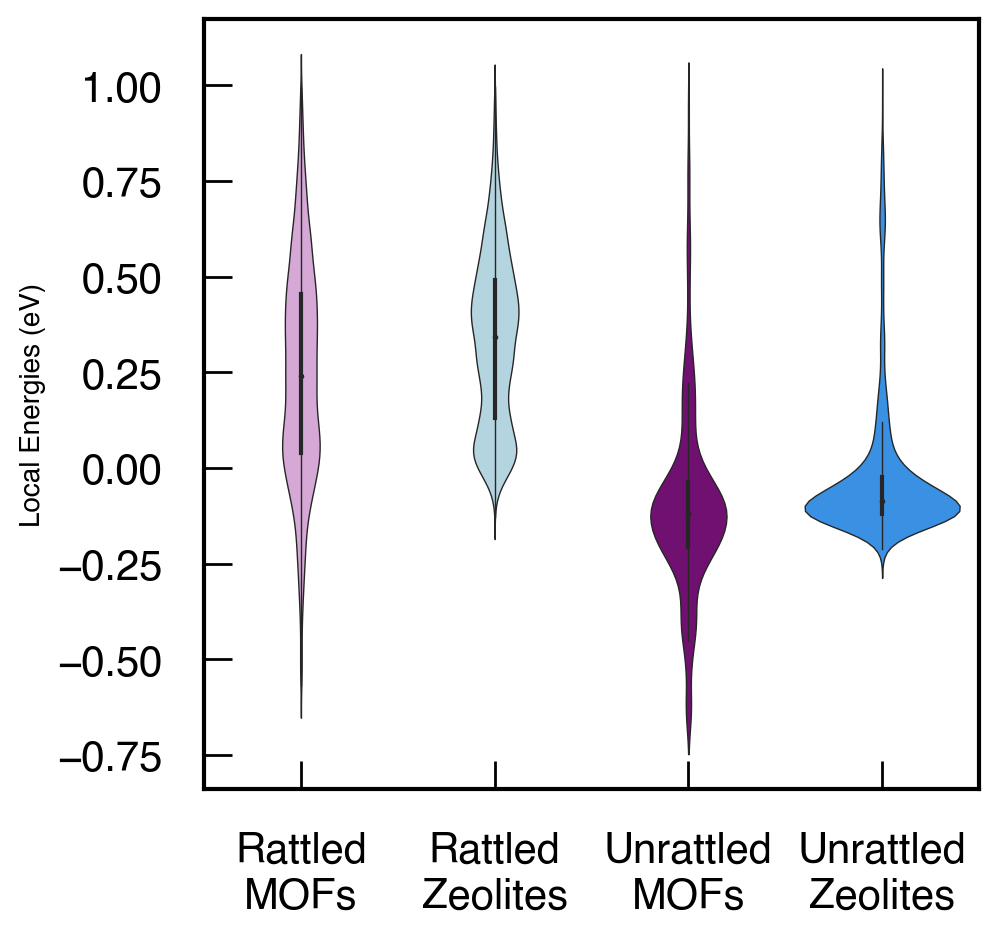

In [4]:
fig, ax = plt.subplots(figsize=(5,5))

sns.violinplot([rattled_mofs,rattled_zeolites,unrattled_mofs,unrattled_zeolites],linewidth=0.5, palette=['plum','lightblue','purple','dodgerblue'], ax=ax)
ax.set_xticklabels(['Rattled\nMOFs','Rattled\nZeolites','Unrattled\nMOFs','Unrattled\nZeolites'])
ax.set_ylabel('Local Energies (eV)')
# plt.savefig('energy_distribution_new_labels.png',dpi=300,bbox_inches='tight')

In [5]:
rattled_zeolites = np.concatenate(get_energies(df_zeolites, id_tags=df_zeolites.columns,batches=all_rattled_batches,energy_type="energies_mofff"))
rattled_mofs = np.concatenate(get_energies(df_mofs,id_tags=df_mofs.columns,batches=all_rattled_batches,energy_type="energies_mofff"))

unrattled_zeolites = np.concatenate(get_energies(df_zeolites,id_tags=df_zeolites.columns,batches=[1],energy_type="energies_mofff"))
unrattled_mofs = np.concatenate(get_energies(df_mofs, id_tags=df_mofs.columns,batches=[1],energy_type="energies_mofff"))

Text(0, 0.5, 'Zn Energies (eV)')

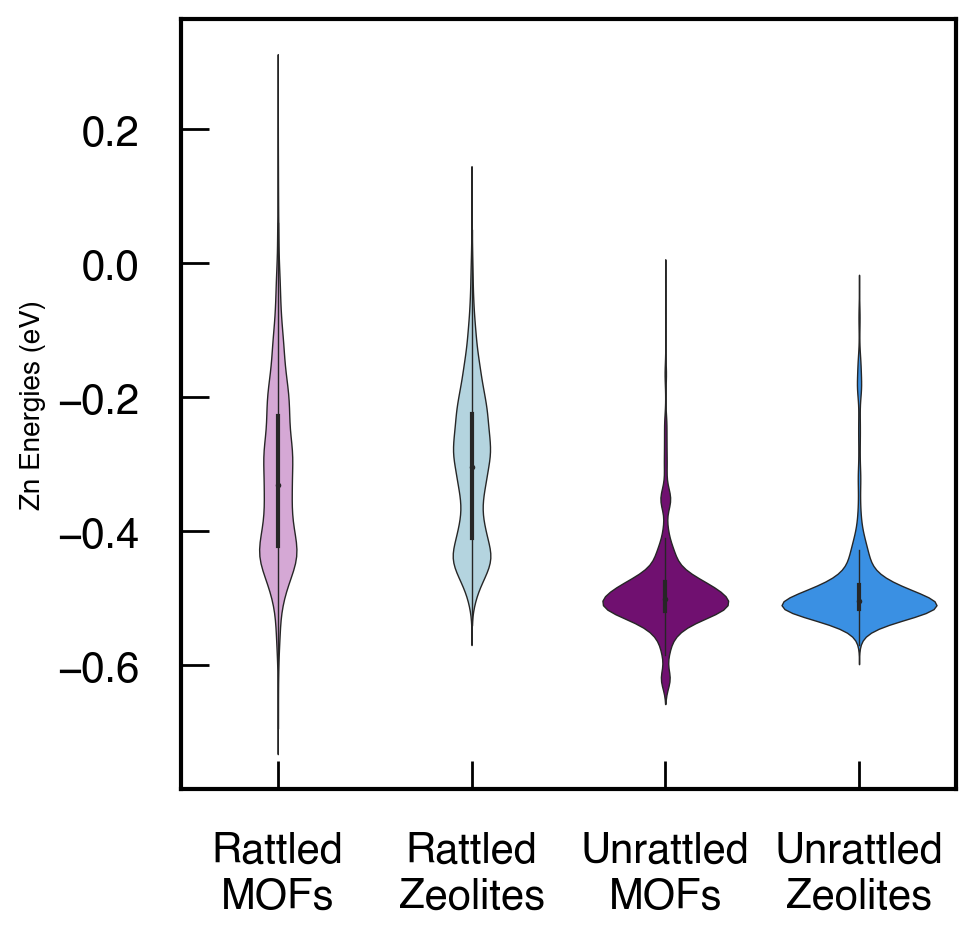

In [7]:
fig, ax = plt.subplots(figsize=(5,5))

sns.violinplot([rattled_mofs,rattled_zeolites,unrattled_mofs,unrattled_zeolites],linewidth=0.5, palette=['plum','lightblue','purple','dodgerblue'], ax=ax)
ax.set_xticklabels(['Rattled\nMOFs','Rattled\nZeolites','Unrattled\nMOFs','Unrattled\nZeolites'])
ax.set_ylabel('Zn Energies (eV)')

In [8]:
df_mofs = get_all_data(MOF, coarse_grain=True,im_linker="CH3")
df_mofs,a_mofs = remove_high_energy_structures(df_mofs, energy_cutoff=1)
df_mofs = remove_null_columns(df_mofs)

df_zeolites = get_all_data(ZEOLITE, coarse_grain=True,im_linker="CH3")
df_zeolites,a_zeolites = remove_high_energy_structures(df_zeolites, energy_cutoff=1)
df_zeolites = remove_null_columns(df_zeolites)

In [9]:
rattled_zeolites = np.concatenate(get_energies(df_zeolites, id_tags=df_zeolites.columns,batches=all_rattled_batches))
rattled_mofs = np.concatenate(get_energies(df_mofs,id_tags=df_mofs.columns,batches=all_rattled_batches))

unrattled_zeolites = np.concatenate(get_energies(df_zeolites,id_tags=df_zeolites.columns,batches=[1]))
unrattled_mofs = np.concatenate(get_energies(df_mofs, id_tags=df_mofs.columns,batches=[1]))

Text(0, 0.5, 'Local Energies (eV)')

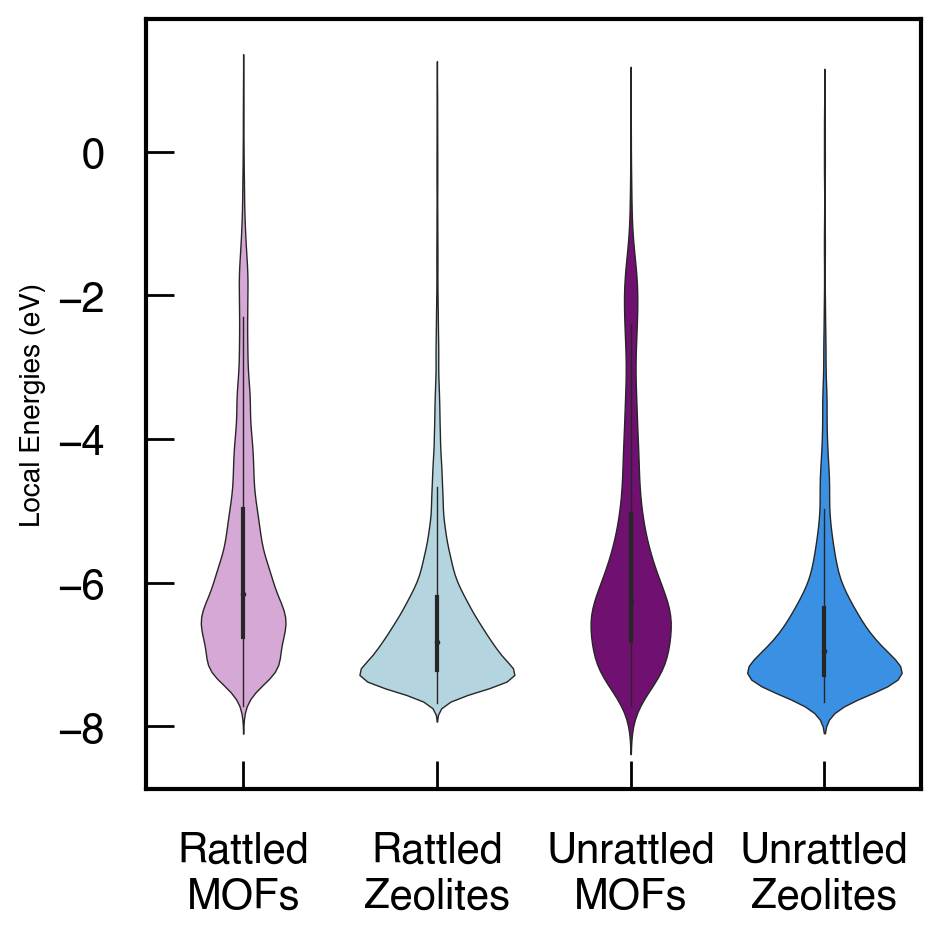

In [10]:
fig, ax = plt.subplots(figsize=(5,5))

sns.violinplot([rattled_mofs,rattled_zeolites,unrattled_mofs,unrattled_zeolites],linewidth=0.5, palette=['plum','lightblue','purple','dodgerblue'], ax=ax)
ax.set_xticklabels(['Rattled\nMOFs','Rattled\nZeolites','Unrattled\nMOFs','Unrattled\nZeolites'])
ax.set_ylabel('Local Energies (eV)')
# plt.savefig('energy_distribution_new_labels.png',dpi=300,bbox_inches='tight')

## Local vs Zn Energies

In [2]:
complete_cg_df,_ = get_complete_dataframes(energy_cutoff=1)

In [3]:
id_tags = complete_cg_df.columns
batches = all_rattled_batches

In [4]:
energies = []
# loop over id tags
# for each id tag, get the structures for the specified batches
for i in id_tags:
    structures = []
    e = []
    for b in batches:
        structures.append(complete_cg_df.loc[b][i].dropna())

    structures = np.concatenate(structures)

    if len(structures) == 0:
        continue
    else:
        # loop over the structures
        # for each structure, get the local energies for each Si atom
        for s in structures:
            e.append(s.arrays["e_local_mofff"][s.numbers == 14])

    energies.append(np.concatenate(e))
all_local_energies = np.concatenate(energies)

In [5]:
# ref = get_reference_structure()
# normalised_local_energies = normalise_energies(all_local_energies,ref)

In [6]:
energies = []
# loop over id tags
# for each id tag, get the structures for the specified batches
for i in id_tags:
    structures = []
    e = []
    for b in batches:
        structures.append(complete_cg_df.loc[b][i].dropna())

    structures = np.concatenate(structures)

    if len(structures) == 0:
        continue
    else:
        # loop over the structures
        # for each structure, get the local energies for each Si atom
        for s in structures:
            e.append(s.arrays["energies_mofff"][s.numbers == 14])

    energies.append(np.concatenate(e))
all_zn_energies = np.concatenate(energies)

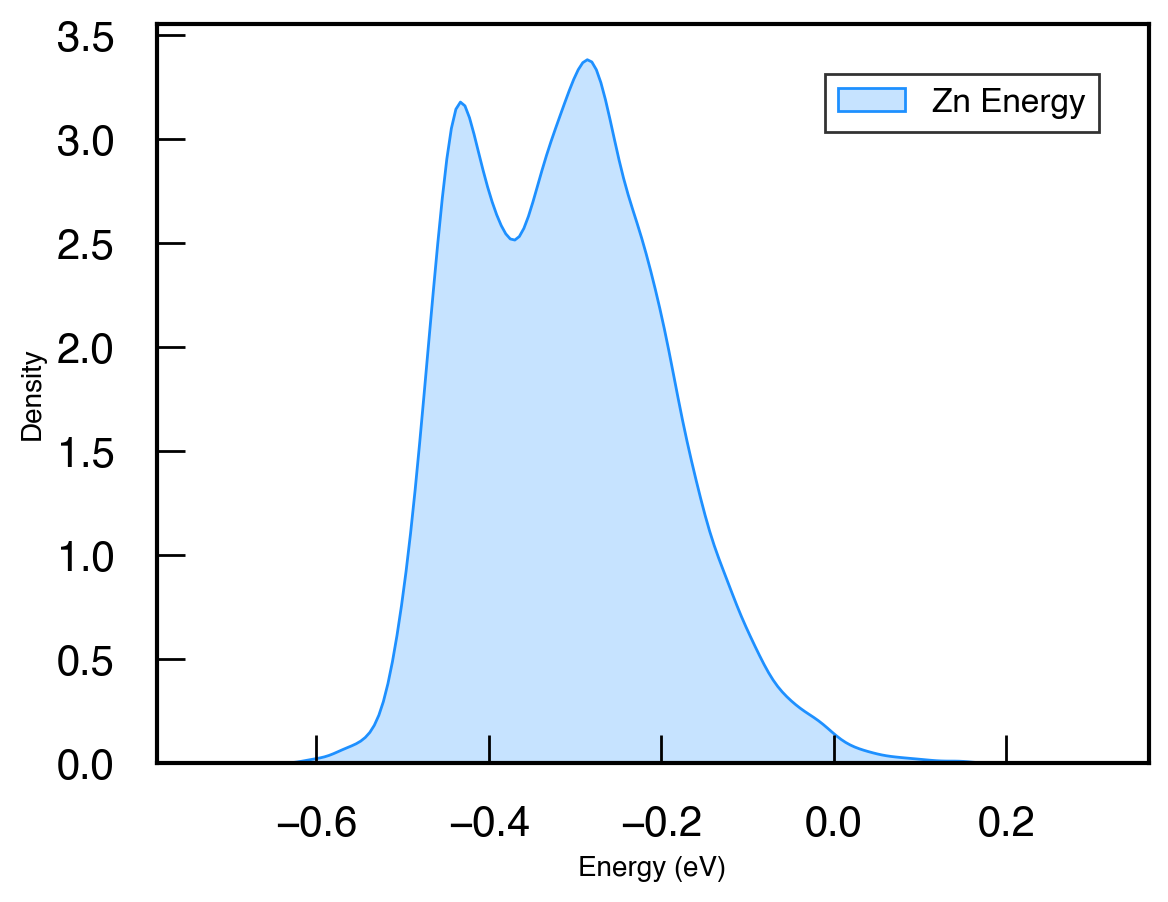

In [7]:
import seaborn as sns

# sns.kdeplot(all_local_energies,fill=True,color='purple',label='Local Energy')
sns.kdeplot(all_zn_energies,fill=True,color='dodgerblue',label='Zn Energy')
plt.xlabel('Energy (eV)')
plt.legend()
# plt.savefig('energy_distribution.png',dpi=300,bbox_inches='tight')

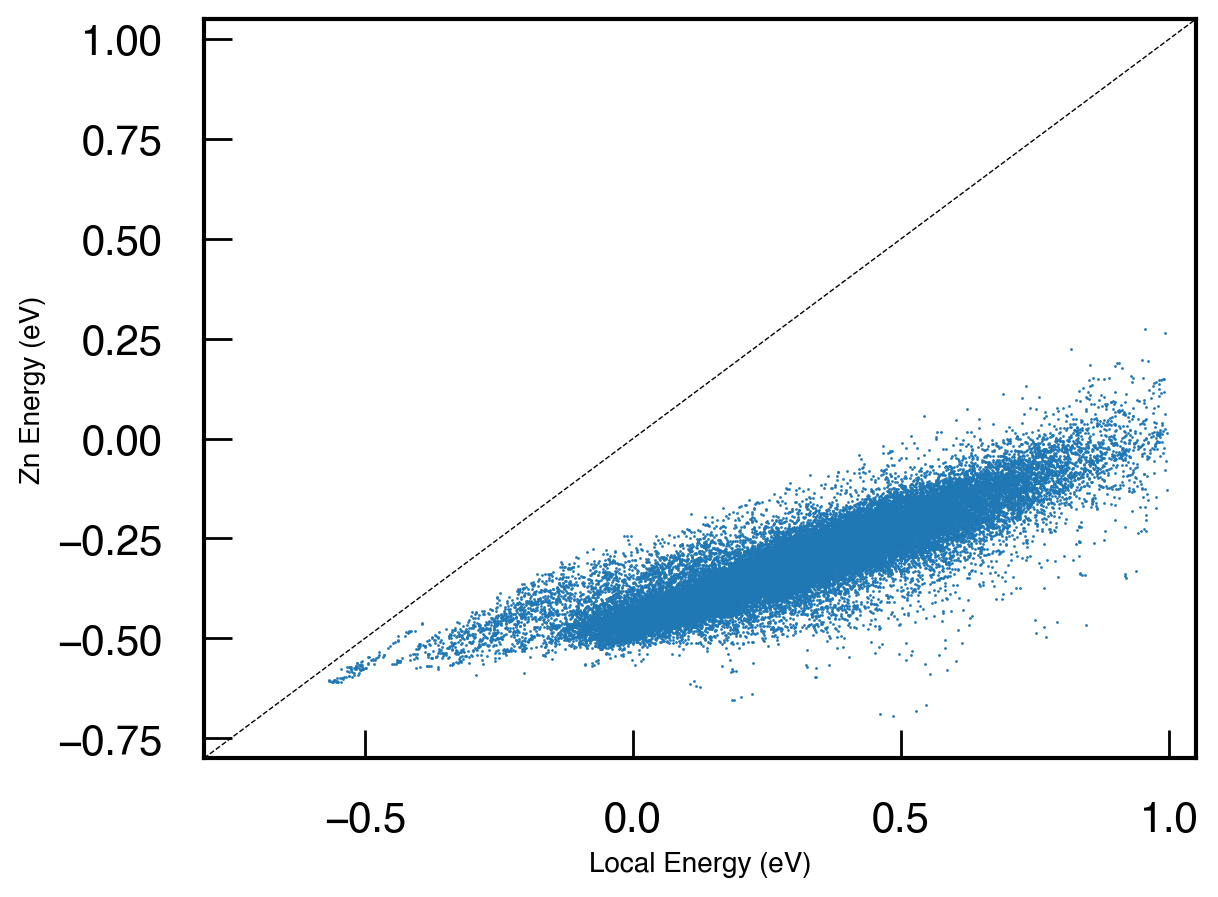

In [15]:
plt.scatter(all_local_energies,all_zn_energies,s=1,linewidths=0)
plt.xlabel('Local Energy (eV)')
plt.ylabel('Zn Energy (eV)')
plt.axline((0,0),(1,1),color='k',zorder=1,linewidth=0.5,linestyle='--')
plt.xlim(-0.8,1.05)
plt.ylim(-0.8,1.05)
plt.savefig('energy_correlation.png',dpi=300,bbox_inches='tight')